**Problema poblacional**

$$E(X-\mu)=0$$

Ecución de problema poblacional; supone que la esperanza de la desviación en la variable X es igual a cero.

**Análogo Muestral**

$$
1/n\sum_{i=1}^{n} (X_i-\hat{\mu})=0
$$

La sumatoria de una muestra de la población, del promedio de la variable menos la media donde proponemos o esperamos que sea cero, es decir, el método aplicado del problema poblacional sobre un problema muestral. 


**Explicacion del GMM**

El GMM se utiliza cuando se sospecha que hay problemas de endogeneidad (la endogeneidad es un término utilizado en estadística y economía para describir una situación en la que existe una correlación entre una variable independiente y el término de error en un modelo) entre las variables explicativas del modelo y cuando el número de momentos es mayor que el número de parámetros a estimar. 

"Tener más ecuaciónes que parámetros", es decir, tengo una distribución de _k_ parámetros, y _q_ condiciones, mayores a los parámetros, así que aaplicamos GMM.

Por ejemplo:

$$
E[(m_j(w,\theta))]=0
$$

$$
\bar{m}(\theta) = 1/n\sum_{i=1}^{n} (m(w_j, \theta))=0
$$

donde
$$
j = 1, .... q
$$


$$
\hat{\theta} =argmin/\theta \{ \bar{m}_1^{2} + \bar{m}_2^{2} + ... + \bar{m}_q^{2}\}
$$

$$
\hat{\theta} =argmin/\theta \{ w_1\bar{m}_1^{2} + w_2\bar{m}_2^{2} + ... + w_q\bar{m}_q^{2}\}
$$

$$
\hat{\theta}^{GMM} =argmin/\theta \{\bar{m}(\theta)' W\bar{m}(\theta)\}
$$

- _w_ representan los datos (de la observación _j_), cabe mencionar que se le artibuye el peso de 1 incialmente, o el de la matriz identidad si hablamos de matrices, pero puede tomar cualquier otro valor para adaptar con los pesos de las funciones mientras que W sea una matríz definida positiva

- $\theta$ al prámetro que estamos tratando de estimar

- _m_ es un vector de _q_x1 funciones que tienen esperanza cero en población

Asumimos que empezamos con una matriz _W = I_, para despues resolver para el

_<center>ESTIMADOR EFICIENTE:</center>_

$$
W = V[m(\theta)]^{-1}
$$

Entonces,

$$
\hat{\theta}^{GMM, 1} =argmin/\theta \{\bar{m}(\theta)'I\bar{m}(\theta)\}
$$

Usamos ese $\hat{\theta}^{GMM, 1}$ para calcular el estimador eficiente y sustituirlo en la ecuacion de

$$
\hat{\theta}^{GMM, 2} =argmin/\theta \{\bar{m}(\theta)' \hat{W}\bar{m}(\theta)\}
$$

**<center>ANALISIS GMM</center>**


In [94]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
df = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 

df



,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


Las variables a analizar son 
- Attribute5 Cantidad de crédito
- Attribute8 Tasa de cuota en porcentaje de ingresos disponibles
- Attribute11 Residencia actual desde
- Attribute13 Edad
- Attribute16 Número de créditos existentes en este banco (clasificado binariamente como bueno o malo)
- Attribute18 Número de personas responsables de proporcionar mantenimiento (clasificado binariamente como bueno o malo)

In [95]:
df=df.copy()
columnas_seleccionadas = ['Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 'Attribute16', 'Attribute18']
df = df[columnas_seleccionadas]
df
 

,Attribute5,Attribute8,Attribute11,Attribute13,Attribute16,Attribute18
0,1169,4,4,67,2,1
1,5951,2,2,22,1,1
2,2096,2,3,49,1,2
3,7882,2,4,45,1,2
4,4870,3,4,53,2,2
...,...,...,...,...,...,...
995,1736,3,4,31,1,1
996,3857,4,4,40,1,1
997,804,4,4,38,1,1
998,1845,4,4,23,1,1


In [96]:
df.isna().sum()

Attribute5     0
Attribute8     0
Attribute11    0
Attribute13    0
Attribute16    0
Attribute18    0
dtype: int64

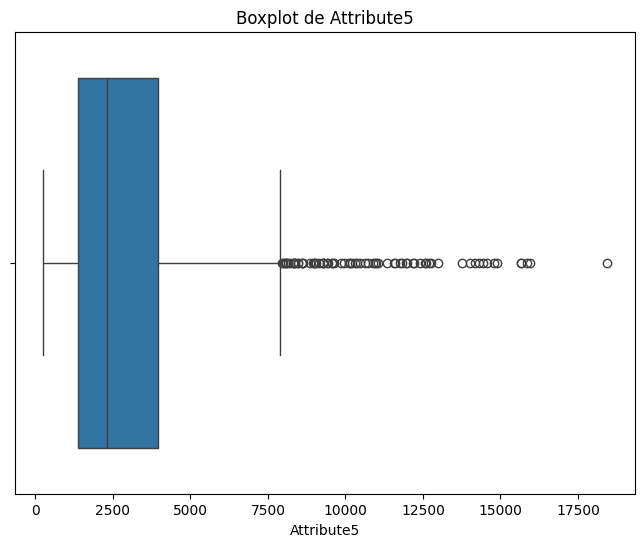

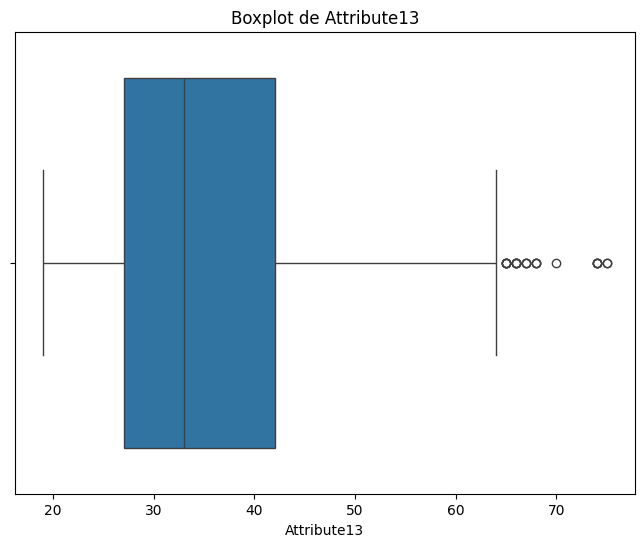

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
columnas_seleccionadas = ['Attribute5',  'Attribute13']
for col in df[columnas_seleccionadas]:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()



**ATRIBUTO 13**

Resago 13:1.0207392686768317


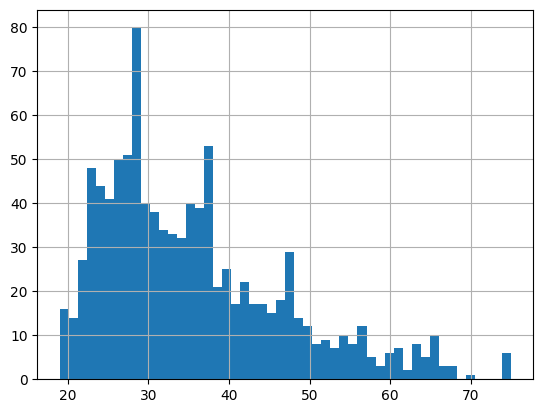

In [98]:
hist2=df["Attribute13"].hist(bins=50)
print("Resago 13:"+ str(df["Attribute13"].skew()))

**ATRIBUTO 11**

Resago:-0.2725698140337228


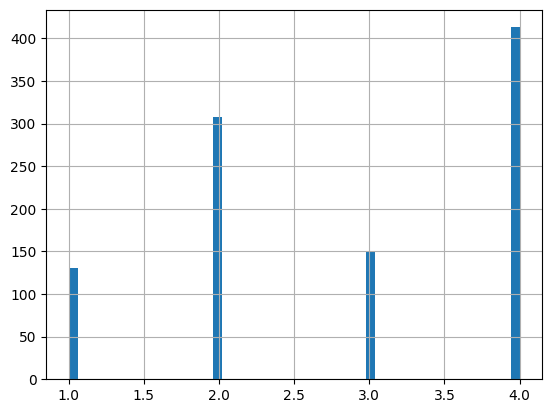

In [99]:
hist2=df["Attribute11"].hist(bins=50)
print("Resago:"+ str(df["Attribute11"].skew()))

**Atributo 5**

Resago:1.9496276798326209


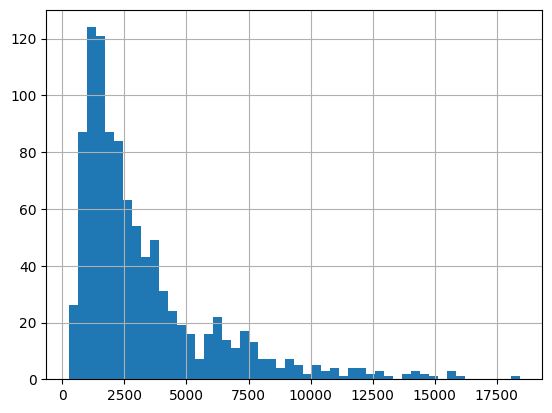

In [101]:
hist2=df["Attribute5"].hist(bins=50)
print("Resago:"+ str(df["Attribute5"].skew()))

**ATRIBUTO 8**

Resago 8:-0.5313481143125486


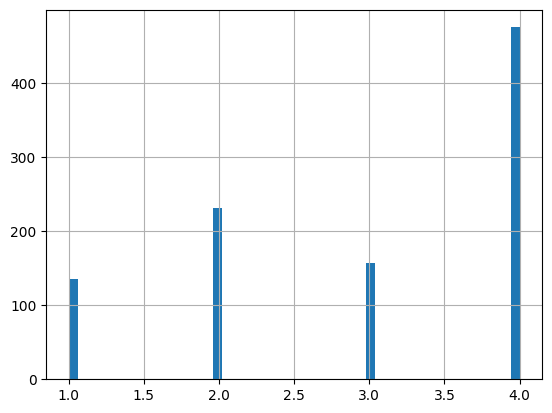

In [102]:
hist2=df["Attribute8"].hist(bins=50)
print("Resago 8:"+ str(df["Attribute8"].skew()))

Estamos interesados en un modelo que relaciona el riesgo de crédito con varias variables presentadas.

In [103]:
print(df.columns)

Index(['Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 'Attribute16',
       'Attribute18'],
      dtype='object')


En este caso, se esta definiendo una función que calcula la suma de los residuos al cuadrado. Los residuos son la diferencia entre los valores observados y los valores predichos. Los valores predichos se calculan como el producto punto de X y params, donde params son los parámetros del modelo


In [123]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize


from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
df = statlog_german_credit_data.data.features 

# Selecciona las columnas relevantes
variables = ['Attribute8', 'Attribute11', 'Attribute13', 'Attribute16', 'Attribute18']
y = np.exp(df['Attribute5'])  # Apply inverse log transformation
X = df[variables]

# Define the objective function for GMM
def objective(params):
    # Predicciones
    y_pred = np.dot(X, params)
    residuals = y - y_pred
    return np.sum(residuals**2)


params_init = np.ones(len(variables))

# minimize utilizará para encontrar los valores de los parámetros que minimizan tu función objetivo.
#‘BFGS’,que es un método de optimización que utiliza información de la primera y segunda derivada de la función objetivo para encontrar el mínimo.
result = minimize(objective, params_init, method='BFGS')

print('Parámetros optimizados:', result.x)



Parámetros optimizados: [1. 1. 1. 1. 1.]


C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


<math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><mtext>Attribute5</mtext><mo>=</mo><mtext>Attribute8</mtext><mo>+</mo><mtext>Attribute11</mtext><mo>+</mo><mtext>Attribute13</mtext><mo>+</mo><mtext>Attribute16</mtext><mo>+</mo><mtext>Attribute18</mtext></mrow><annotation encoding="application/x-tex">\text{Attribute5} = \text{Attribute8} + \text{Attribute11} + \text{Attribute13} + \text{Attribute16} + \text{Attribute18}
</annotation></semantics></math>